# Instruction

1. All the required dataset are attached with the file.
    (ufo.csv dataset for Question 1,
    u.user dataset for Question 2,
    Movie.csv dataset for Question 3)

In [391]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from matplotlib import style

## Question1

In [285]:
# read ufo.csv into a DataFrame called 'ufo'
ufo = pd.read_csv('ufo.csv')

# print the head and the tail
print(ufo.head())
print("\n")
print(ufo.tail())
print("\n")

# examine the default index, data types, and shape of ufo dataframe
print(ufo.index)
print("\n")
print(ufo.dtypes)
print("\n")
print(ufo.shape)

ufo.head()

                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00


                  City Colors Reported Shape Reported State             Time
33856  West Des Moines             NaN          LIGHT    IA  9/11/2005 21:03
33857           Clovis             NaN          LIGHT    NM  9/11/2005 22:30
33858         Hesperia             NaN       TRIANGLE    CA  9/11/2005 22:30
33859        Dade City             NaN          LIGHT    FL  9/11/2005 23:00
33860         Henniker             NaN            NaN    NH                9


RangeIndex(start=0, stop=33861, step=1)


City               objec

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [286]:
# count the number of missing values in each column
nul = ufo.isnull()
print(nul.count())
print("\n")
# count total number of null vlaues in the dataframe
print(nul.sum())
print("\n")
# print those rows which has null values
nul.value_counts()

City               33861
Colors Reported    33861
Shape Reported     33861
State              33861
Time               33861
dtype: int64


City                  35
Colors Reported    28477
Shape Reported      4191
State                  0
Time                   0
dtype: int64




City   Colors Reported  Shape Reported  State  Time 
False  True             False           False  False    24853
       False            False           False  False     4786
       True             True            False  False     3594
       False            True            False  False      593
True   True             False           False  False       27
       False            False           False  False        4
       True             True            False  False        3
       False            True            False  False        1
dtype: int64

In [287]:
ufo.fillna(ufo.mean())


City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
33856       West Des Moines             NaN          LIGHT    IA   
33857                Clovis             NaN          LIGHT    NM   
33858              Hesperia             NaN       TRIANGLE    CA   
33859             Dade City             NaN          LIGHT    FL   
33860              Henniker             NaN            NaN    NH   

                  Time  
0       6/1/1930 22:00  
1      6/30/1930 20:00  
2      2/15/1931 14:00  
3       6/1/1931 13:00  
4      4/18/1933 19:00  
...                ...  
33856  9/11/2005 21:03  
33857  9/11/2005 22:30  
33858  9/11/2005 22:30  
33859  9/11/2005 23:00  
33860                9  

[33861 rows x 5 columns]

In [558]:
# fill null values, 
#if any column is numerical has null value than fill this column with mean of that column
ufo.fillna(ufo.mean())

#if any column is categorical than fill this column with most frequent value of that column
ufo.fillna(ufo.mode())

City Colors_Reported Shape_Reported State  \
0                    Ithaca             RED       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
33856       West Des Moines             NaN          LIGHT    IA   
33857                Clovis             NaN          LIGHT    NM   
33858              Hesperia             NaN       TRIANGLE    CA   
33859             Dade City             NaN          LIGHT    FL   
33860              Henniker             NaN            NaN    NH   

                  Time                  Location  
0       6/1/1930 22:00                Ithaca, NY  
1      6/30/1930 20:00           Willingboro, NJ  
2      2/15/1931 14:00               Holyoke, CO  
3       6/1/1931 13:00               Abilene, KS  
4      4/18/1933 19:00  New York Worlds Fair, NY  
...                ...                       ...  
33856  9/11/2005 21:03       West Des Moines, IA  
33857  9/11/2005 22:30                Clovis, NM  
33858  9/11/2005 22:30              Hesperia, CA  
33859  9/11/2005 23:00             Dade City, FL  
33860                9              Henniker, NH  

[33861 rows x 6 columns]

In [289]:
ufo = pd.read_csv('ufo.csv')
# calculate the most frequent value for each of the columns (in a single command)
ufo.describe()
print("\n")

# what are the four most frequent colors reported?
# ufo['Colors Reported'].value_counts().idxmax()
print(ufo['Colors Reported'].value_counts()[:4])
print("\n")

# for reports in VA, what's the most frequent city?
print(ufo[ufo.State=='VA'].City.value_counts().head(1))
print("\n")

# show only the UFO reports from Arlington, VA
print(ufo[(ufo["City"] == "Arlington") & (ufo["State"] == "VA")])
print("\n")

# show only the UFO reports in which the City is missing
print(ufo[ufo["City"].isnull() == True].head())
print("\n")

# how many rows remain if you drop all rows with any missing values?
print((ufo.count().sum()) - ufo.dropna().count().sum())
print("\n")

# replace any spaces in the column names with an underscore
ufo.columns = ufo.columns.str.replace(' ', '_')
print(ufo.columns)
print("\n")

# create a new column called 'Location' that includes both City and State
# For example, the 'Location' for the first row would be 'Ithaca, NY'
ufo["Location"] = ufo["City"] + ", " + ufo["State"]
ufo.head()

# map existing values to a different set of values
# like in column 'is_male', convert F value to 0 and M to 1 with pandas

# writing generic code to replace spaces with underscores
# In other words, your code should not reference the specific column names
ufo.columns = ufo.columns.str.replace(' ', '_')

# convert datatype of column 'time'  to the datetime format
# ufo['Time'] = pd.to_datetime(ufo.Time)




RED       1555
ORANGE     999
GREEN      887
BLUE       825
Name: Colors Reported, dtype: int64


Virginia Beach    45
Name: City, dtype: int64


            City Colors Reported Shape Reported State              Time
202    Arlington           GREEN           OVAL    VA   7/13/1952 21:00
6300   Arlington             NaN        CHEVRON    VA    5/5/1990 21:40
10278  Arlington             NaN           DISK    VA   5/27/1997 15:30
14527  Arlington             NaN          OTHER    VA   9/10/1999 21:41
17984  Arlington             RED           DISK    VA  11/19/2000 22:00
21201  Arlington           GREEN       FIREBALL    VA    1/7/2002 17:45
22633  Arlington             NaN          LIGHT    VA    7/26/2002 1:15
22780  Arlington             NaN          LIGHT    VA    8/7/2002 21:00
25066  Arlington             NaN          CIGAR    VA    6/1/2003 22:34
27398  Arlington             NaN        VARIOUS    VA   12/13/2003 2:00
30608  Arlington             NaN         CIRCLE    VA   10/9

# Question 2

In [290]:
#importing file
users = pd.read_table('u.user', sep='|', index_col='user_id')

Describe and show the dataframe

In [291]:
# describe information of all columns
print(users.describe(include='all'))
print("\n")

# describe information of all numeric columns only
print(users.describe())
print("\n")

# describe information of all object columns only
print(users.describe(include='object'))
print("\n")

# show first 10 rows of users dataframe
users.head(10)

               age gender occupation zip_code
count   943.000000    943        943      943
unique         NaN      2         21      795
top            NaN      M    student    55414
freq           NaN    670        196        9
mean     34.051962    NaN        NaN      NaN
std      12.192740    NaN        NaN      NaN
min       7.000000    NaN        NaN      NaN
25%      25.000000    NaN        NaN      NaN
50%      31.000000    NaN        NaN      NaN
75%      43.000000    NaN        NaN      NaN
max      73.000000    NaN        NaN      NaN


              age
count  943.000000
mean    34.051962
std     12.192740
min      7.000000
25%     25.000000
50%     31.000000
75%     43.000000
max     73.000000


       gender occupation zip_code
count     943        943      943
unique      2         21      795
top         M    student    55414
freq      670        196        9




age gender     occupation zip_code
user_id                                    
1         24      M     technician    85711
2         53      F          other    94043
3         23      M         writer    32067
4         24      M     technician    43537
5         33      F          other    15213
6         42      M      executive    98101
7         57      M  administrator    91344
8         36      M  administrator    05201
9         29      M        student    01002
10        53      M         lawyer    90703

detecting duplicate rows

In [292]:
users = pd.read_table('u.user', sep='|', index_col='user_id')
# check wheather a row is identical to a previous row
print(users.duplicated().any())
print("\n")

# count all duplicate rows in the dataframe
print(users.duplicated().count())

# show only duplicate rows in the dataframe
print(users[users.duplicated()])
print("\n")

# drop all duplicate rows in the dataframe
users = users.drop_duplicates()  
print(users.duplicated().any())
print("\n")

# check a single specific column for duplicates occur or not
print(users.age.duplicated().any())
print("\n")

# check specify more than one column for finding duplicates
users.duplicated(['age', 'gender', 'zip_code']).any()

True


943
         age gender occupation zip_code
user_id                                
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301


False


True




True

In [293]:
# display the 3 most frequent occupations in 'users'
print(users['occupation'].value_counts()[:3])
print("\n")

# change the data type of a column name age from int to float
users['age'] = users['age'].astype(float)
print(users)
print("\n")

# for each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

student     192
other       103
educator     94
Name: occupation, dtype: int64


          age gender     occupation zip_code
user_id                                     
1        24.0      M     technician    85711
2        53.0      F          other    94043
3        23.0      M         writer    32067
4        24.0      M     technician    43537
5        33.0      F          other    15213
...       ...    ...            ...      ...
939      26.0      F        student    33319
940      32.0      M  administrator    02215
941      20.0      M        student    97229
942      48.0      F      librarian    78209
943      22.0      M        student    77841

[936 rows x 4 columns]




min   max
occupation               
administrator  21.0  70.0
artist         19.0  48.0
doctor         28.0  64.0
educator       23.0  63.0
engineer       22.0  70.0
entertainment  15.0  50.0
executive      22.0  69.0
healthcare     22.0  62.0
homemaker      20.0  50.0
lawyer         21.0  53.0
librarian      23.0  69.0
marketing      24.0  55.0
none           11.0  55.0
other          13.0  64.0
programmer     20.0  63.0
retired        51.0  73.0
salesman       18.0  66.0
scientist      23.0  55.0
student         7.0  42.0
technician     21.0  55.0
writer         18.0  60.0



AxesSubplot(0.125,0.125;0.775x0.755)


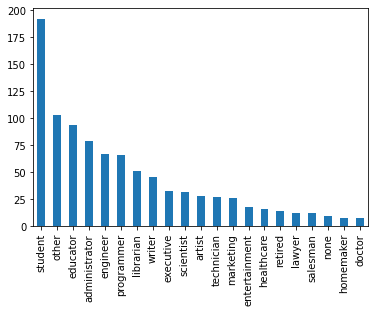

In [301]:
# for each occupation in 'users', count the number of occurrences
occ = users.occupation.value_counts()
# print(occ)
print("\n")

# plot barchar of upper out w.r.t each occupation 
print(occ.plot(kind='bar'))

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         41.914894
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.504854
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.031250
technician       33.148148
writer           36.311111
Name: age, dtype: float64
AxesSubplot(0.260833,0.125;0.503333x0.755)


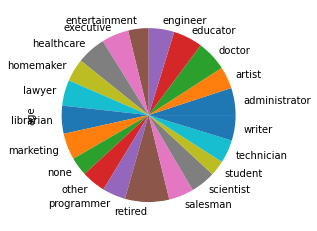

In [306]:
# for each occupation, calculate the mean age
m = users.groupby("occupation").age.mean()
print(m)

# plot pie chart of the upper output
print(m.plot(kind='pie'))

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         42.985294
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.470588
               M         34.028986
programmer     F         32.16666

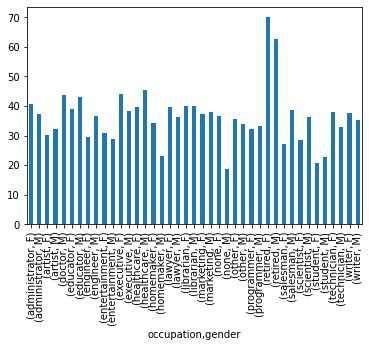

In [314]:
# for each combination of occupation and gender, calculate the mean age
comb = users.groupby(["occupation", "gender"]).age.mean()
print(comb)

# plot barchar of upper out w.r.t each occupation and gender 
print(comb.plot(kind='bar'))

In [315]:
# sort 'users' by 'occupation' and then by 'age' (in a single command)
users.sort_values(['occupation','age'])

age gender     occupation zip_code
user_id                                     
118      21.0      M  administrator    90210
180      22.0      F  administrator    60202
282      22.0      M  administrator    20057
317      22.0      M  administrator    13210
439      23.0      F  administrator    20817
...       ...    ...            ...      ...
548      51.0      M         writer    95468
370      52.0      M         writer    08534
392      52.0      M         writer    59801
558      56.0      F         writer    63132
464      60.0      M         writer    94583

[936 rows x 4 columns]

# Question 3

In [494]:
# read movie.csv into a DataFrame called 'movie'
movie = pd.read_csv('movie.csv')

# describe the dataframe
print(movie.describe)
print("\n")
print(movie.head())
print("\n")
print(movie.shape)
print("\n")
print(movie.dtypes)
print("\n")

#rename the column Runtime (Minutes) with Runtime_Minutes, and Revenue (Millions) with Revenue_Millions 
movie.rename(columns={  'Runtime (Minutes)':'Runtime_Minutes','Revenue (Millions)':'Revenue_Millions'},inplace=True)

movie.columns

<bound method NDFrame.describe of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [495]:
# show if any column has null value
print(movie.isnull().any()) 
print("\n")

# count total number of null vlaues in the dataframe
print(movie.isnull().sum().sum())
print("\n")

# print those rows which has null values
movie.isnull().any(axis=1)

Rank                False
Title               False
Genre               False
Description         False
Director            False
Actors              False
Year                False
Runtime_Minutes     False
Rating              False
Votes               False
Revenue_Millions     True
Metascore            True
dtype: bool


192




0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Length: 1000, dtype: bool

In [496]:
# fill null values, 
#if column is numerical than fill with means (if there is no numerical missing value in 
#data frame then don't code in this)

#if column is categorical than fill with most frequent value (if there is no categorical missing value in 
#data frame then don't code in this)



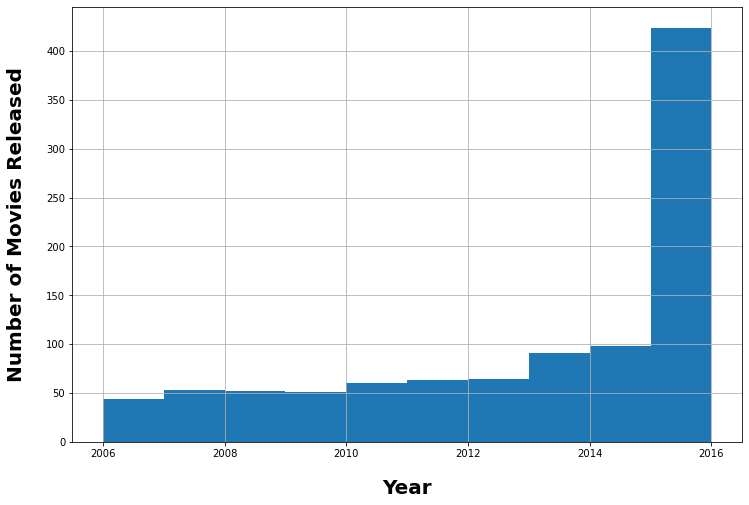

In [497]:
# plot histogram of the column name year in movie dataframe, which shows how many movies release in a year.
fig, ax = plt.subplots(figsize =(12, 8))

ax.set_xlabel("Year", labelpad=20, weight='bold', size=20)
ax.set_ylabel("Number of Movies Released", labelpad=20, weight='bold', size=20)

movie["Year"].hist()

plt.show()

In [498]:
movie.head(2)

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   

                                         Description      Director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              Actors  Year  Runtime_Minutes  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014              121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012              124   

   Rating   Votes  Revenue_Millions  Metascore  
0     8.1  757074            333.13       76.0  
1     7.0  485820            126.46       65.0

In [499]:
# print the movie detail with title 'Grumpier Old Men'.
movie[movie["Title"] == "Grumpier Old Men"]

Empty DataFrame
Columns: [Rank, Title, Genre, Description, Director, Actors, Year, Runtime_Minutes, Rating, Votes, Revenue_Millions, Metascore]
Index: []

In [500]:
# show those movies which are released after 1995-01-01
movie[movie["Year"] >= 1995]

Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  Runtime_Minutes  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014              121   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012              124   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016              117   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016              108   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016              123   
..                                                 ...   ...              ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015              111   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007               94   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008               98   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014               93   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016               87   

     Rating   Votes  Revenue_Millions  Metascore  
0       8.1  757074            333.13       76.0  
1       7.0  485820            126.46       65.0  
2       7.3  157606            138.12       62.0  
3       7.2   60545            270.32       59.0  
4       6.2  393727            325.02       40.0  
..      ...     ...               ...        ...  
995     6.2   27585               NaN       45.0  
996     5.5   73152             17.54       46.0  
997     6.2   70699             58.01       50.0  
998     5.6    4881               NaN       22.0  
999     5.3   12435             19.64       11.0  

[1000 rows x 12 columns]

In [501]:
# sort the movie DataFrame in decending order based on release_date
movie.sort_values("Year", ascending=False)

Rank                               Title                    Genre  \
999  1000                          Nine Lives    Comedy,Family,Fantasy   
161   162                           Free Fire      Action,Comedy,Crime   
647   648                            Tall Men  Fantasy,Horror,Thriller   
234   235          The Huntsman: Winter's War   Action,Adventure,Drama   
653   654  Popstar: Never Stop Never Stopping             Comedy,Music   
..    ...                                 ...                      ...   
715   716                          Happy Feet  Animation,Comedy,Family   
727   728                     The Illusionist    Drama,Mystery,Romance   
965   966                       Inland Empire   Drama,Mystery,Thriller   
559   560                           Idiocracy  Adventure,Comedy,Sci-Fi   
230   231                     Pan's Labyrinth        Drama,Fantasy,War   

                                           Description               Director  \
999  A stuffy businessman finds himself trapped ins...       Barry Sonnenfeld   
161  Set in Boston in 1978, a meeting in a deserted...           Ben Wheatley   
647  A challenged man is stalked by tall phantoms i...      Jonathan Holbrook   
234  Eric and fellow warrior Sara, raised as member...  Cedric Nicolas-Troyan   
653  When it becomes clear that his solo album is a...         Akiva Schaffer   
..                                                 ...                    ...   
715  Into the world of the Emperor Penguins, who fi...          George Miller   
727  In turn-of-the-century Vienna, a magician uses...            Neil Burger   
965  As an actress starts to adopt the persona of h...            David Lynch   
559  Private Joe Bauers, the definition of "average...             Mike Judge   
230  In the falangist Spain of 1944, the bookish yo...     Guillermo del Toro   

                                                Actors  Year  Runtime_Minutes  \
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016               87   
161  Sharlto Copley, Brie Larson, Armie Hammer, Cil...  2016               90   
647  Dan Crisafulli, Kay Whitney, Richard Garcia, P...  2016              133   
234  Chris Hemsworth, Jessica Chastain, Charlize Th...  2016              114   
653  Andy Samberg, Jorma Taccone,Akiva Schaffer, Sa...  2016               87   
..                                                 ...   ...              ...   
715  Elijah Wood, Brittany Murphy, Hugh Jackman, Ro...  2006              108   
727  Edward Norton, Jessica Biel, Paul Giamatti, Ru...  2006              110   
965  Laura Dern, Jeremy Irons, Justin Theroux, Karo...  2006              180   
559  Luke Wilson, Maya Rudolph, Dax Shepard, Terry ...  2006               84   
230  Ivana Baquero, Ariadna Gil, Sergi López,Maribe...  2006              118   

     Rating   Votes  Revenue_Millions  Metascore  
999     5.3   12435             19.64       11.0  
161     7.0    6946              1.80       63.0  
647     3.2     173               NaN       57.0  
234     6.1   66766             47.95       35.0  
653     6.7   30875              9.39       68.0  
..      ...     ...               ...        ...  
715     6.5  141141            197.99       77.0  
727     7.6  309934             39.83       68.0  
965     7.0   44227               NaN        NaN  
559     6.6  115355              0.44       66.0  
230     8.2  498879             37.62       98.0  

[1000 rows x 12 columns]

Genre
Action                         2
Action,Adventure               3
Action,Adventure,Biography     2
Action,Adventure,Comedy       14
Action,Adventure,Crime         6
                              ..
Romance,Sci-Fi,Thriller        1
Sci-Fi                         2
Sci-Fi,Thriller                1
Thriller                       9
Thriller,War                   1
Name: Genre, Length: 207, dtype: int64




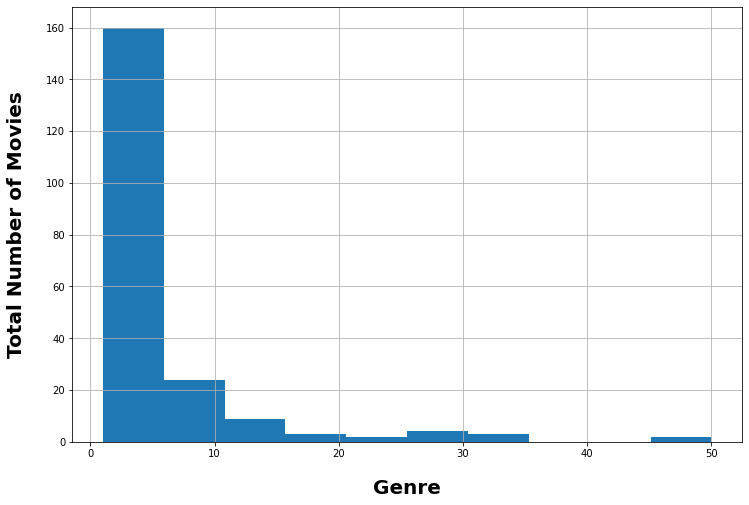

In [502]:
# for each year, display the total number of movie with specific gerne for example Action=1000,adventure=400
tot_mov = movie.groupby("Genre")["Genre"].count()
print(tot_mov)
print("\n")

# plot histogram the upper calculated total count
fig, ax = plt.subplots(figsize =(12, 8))

ax.set_xlabel("Genre", labelpad=20, weight='bold', size=20)
ax.set_ylabel("Total Number of Movies", labelpad=20, weight='bold', size=20)

tot_mov.hist()

plt.show()

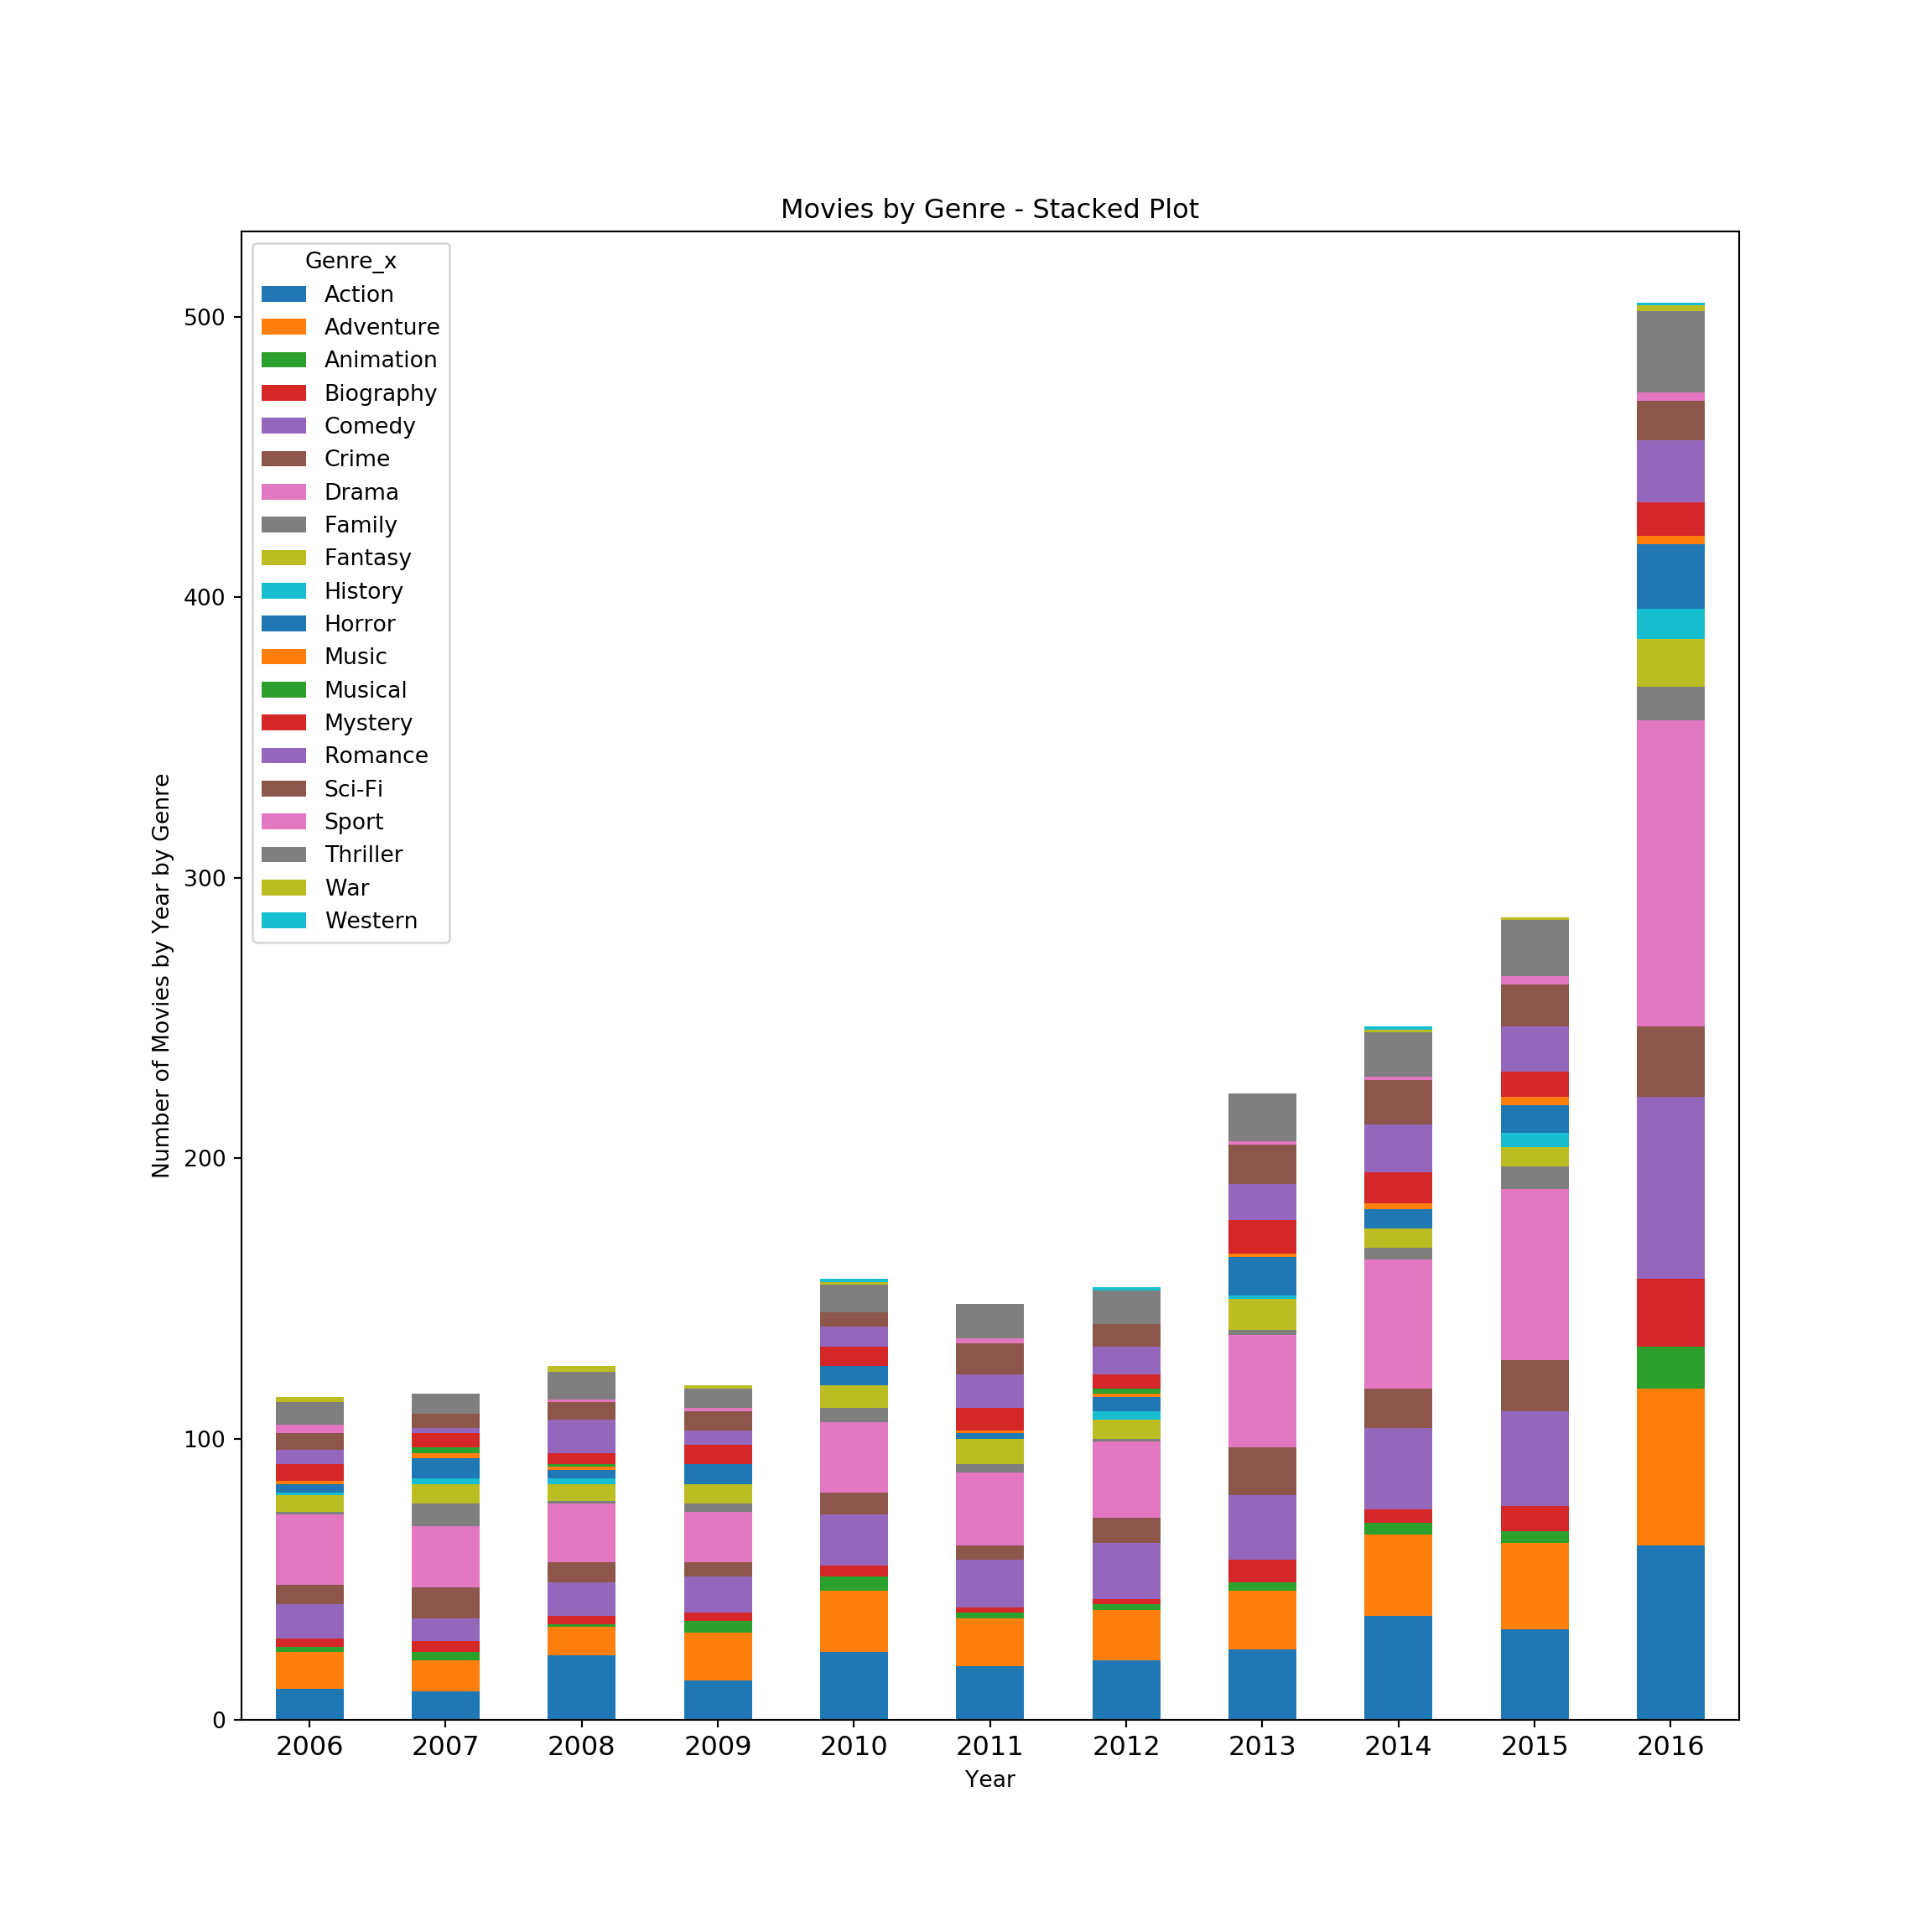

In [503]:
# filter the movies with specific gerne
# like show only those movies which are selected Action gerne
movie[movie["Genre"] == "Action"]

Rank                 Title   Genre  \
123   124  Boyka: Undisputed IV  Action   
580   581  Kickboxer: Vengeance  Action   

                                           Description         Director  \
123  In the fourth installment of the fighting fran...  Todor Chapkanov   
580         A kick boxer is out to avenge his brother.   John Stockwell   

                                                Actors  Year  Runtime_Minutes  \
123  Scott Adkins, Teodora Duhovnikova, Alon Aboutb...  2016               86   
580  Dave Bautista, Alain Moussi, Gina Carano, Jean...  2016               90   

     Rating  Votes  Revenue_Millions  Metascore  
123     7.4  10428               NaN        NaN  
580     4.9   6809            131.56       37.0

James Gunn


     Rank                    Title                    Genre  \
0       1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   
908   909                  Slither     Comedy,Horror,Sci-Fi   
937   938                    Super             Comedy,Drama   

                                           Description    Director  \
0    A group of intergalactic criminals are forced ...  James Gunn   
908  A small town is taken over by an alien plague,...  James Gunn   
937  After his wife falls under the influence of a ...  James Gunn   

                                                Actors  Year  Runtime_Minutes  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014              121   
908  Nathan Fillion, Elizabeth Banks, Michael Rooke...  2006               95   
937   Rainn Wilson, Ellen Page, Liv Tyler, Kevin Bacon  2010               96   

     Rating   Votes  Revenue_Millions  Metascore  
0       8.1  757074            333.13       76.0  
908     6.5   64351       

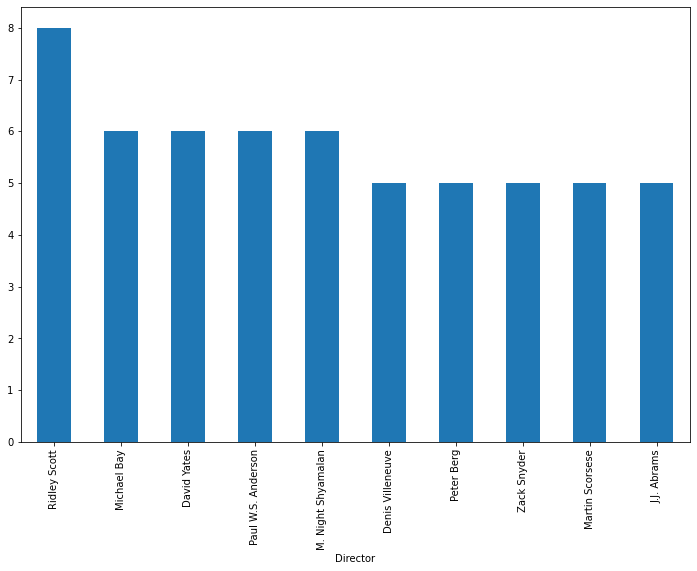

In [504]:
# for each Director, display all the movies with detail.
for director in (movie["Director"].unique().tolist()):
    dir_mov = movie[movie["Director"] == director]
    print(director)
    print("\n")
    print(dir_mov.head())
    print("\n")
    print("\n")
    

# count the movies and plot barchart top 10 director's movies.
fig, ax = plt.subplots(figsize =(12, 8))
movie.groupby("Director")["Director"].count().sort_values(ascending=False).head(10).plot.bar()
plt.show()

Rebecca Hall


     Rank                     Title                 Genre  \
460   461                  The Town  Crime,Drama,Thriller   
556   557                  The Gift      Mystery,Thriller   
709   710            Closed Circuit   Crime,Drama,Mystery   
823   824                 Christine       Biography,Drama   
853   854  Vicky Cristina Barcelona         Drama,Romance   

                                           Description        Director  \
460  As he plans his next job, a longtime thief tri...     Ben Affleck   
556  A young married couple's lives are thrown into...   Joel Edgerton   
709  A high-profile terrorism case unexpectedly bin...    John Crowley   
823  The story of Christine Chubbuck, a 1970s TV re...  Antonio Campos   
853  Two girlfriends on a summer holiday in Spain b...     Woody Allen   

                                                Actors  Year  Runtime_Minutes  \
460  Ben Affleck, Rebecca Hall, Jon Hamm, Jeremy Re...  2010              125   
556  Jason 

KeyError: 'new_actor_alone'

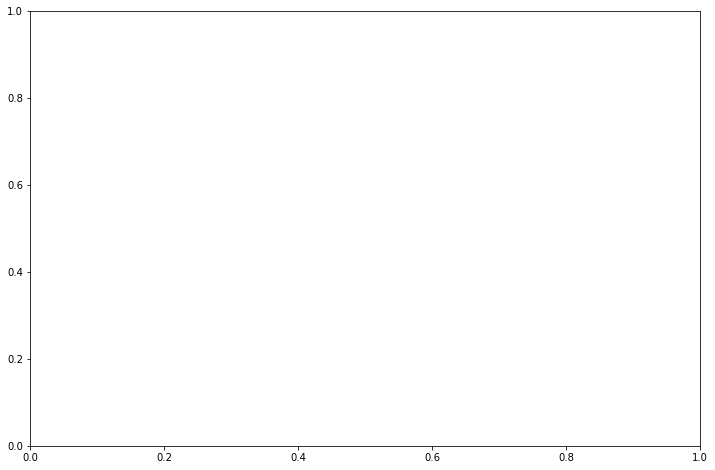

In [510]:
# for each Actor, display all the movies with detail.
actors = movie['Actors'].unique().tolist()
actor_alone=[]

for actor in actors:
    actor_alone.append(actor.split(','))
    
new_actor_alone = set(itertools.chain(*actor_alone))

for actor in new_actor_alone:
    act = movie[movie["Actors"].str.contains(actor)]
    print(actor)
    print("\n")
    print(act.head())
    print("\n")
    print("\n")
    
# count the movies and visualize the top 10 actor's movies in plot
fig, ax = plt.subplots(figsize =(12, 8))
movie.groupby("new_actor_alone")["new_actor_alone"].count().sort_values(ascending=False).head(10).plot.bar()
plt.show()

In [509]:
# filter the movies with specific actor's name
movie[movie['Actors'].str.contains('Matthew McConaughey')].head()

Rank                     Title                       Genre  \
3       4                      Sing     Animation,Comedy,Family   
20     21                      Gold    Adventure,Drama,Thriller   
36     37              Interstellar      Adventure,Drama,Sci-Fi   
82     83   The Wolf of Wall Street      Biography,Comedy,Crime   
171   172  Kubo and the Two Strings  Animation,Adventure,Family   

                                           Description              Director  \
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
20   Kenny Wells, a prospector desperate for a luck...        Stephen Gaghan   
36   A team of explorers travel through a wormhole ...     Christopher Nolan   
82   Based on the true story of Jordan Belfort, fro...       Martin Scorsese   
171  A young boy named Kubo must locate a magical s...         Travis Knight   

                                                Actors  Year  Runtime_Minutes  \
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016              108   
20   Matthew McConaughey, Edgar Ramírez, Bryce Dall...  2016              120   
36   Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014              169   
82   Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...  2013              180   
171  Charlize Theron, Art Parkinson, Matthew McCona...  2016              101   

     Rating    Votes  Revenue_Millions  Metascore  
3       7.2    60545            270.32       59.0  
20      6.7    19053              7.22       49.0  
36      8.6  1047747            187.99       74.0  
82      8.2   865134            116.87       75.0  
171     7.9    72778             48.02       84.0

Actors
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Ezra Miller, Tye Sheridan, Billy Crudup, Olivia Thirlby                1
Eve Lindley, Richard Kind, Mark Consuelos, Katherine Reis              1
Eva Green, Asa Butterfield, Samuel L. Jackson, Judi Dench              1
Name: Rating, dtype: int64


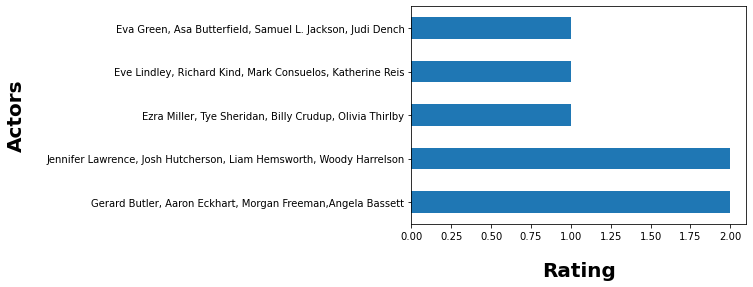

In [511]:
# List of top 5 Actor per year who has highest rating from the year 2010 - 2017
year = movie[(movie['Year'] > 2010) & (movie['Year'] < 2017)]
highest = year.groupby('Actors')['Rating'].count().sort_values(ascending=False).head(5)
print(highest)

# plot horizontal barcahrt of upper output
plt.ylabel("Actors",labelpad=20, weight='bold', size=20)
plt.xlabel("Rating", labelpad=20, weight='bold', size=20)

highest.plot.barh()

plt.show()

In [ ]:
# visualize those to 10 runtime of movies

# visualize those to 10 runtime which has highest rating of movies


In [ ]:
# show count all movies which has rating more 3.0 and less than 7.0

# plot vertical barchart of upper output, movies w.r.t rating


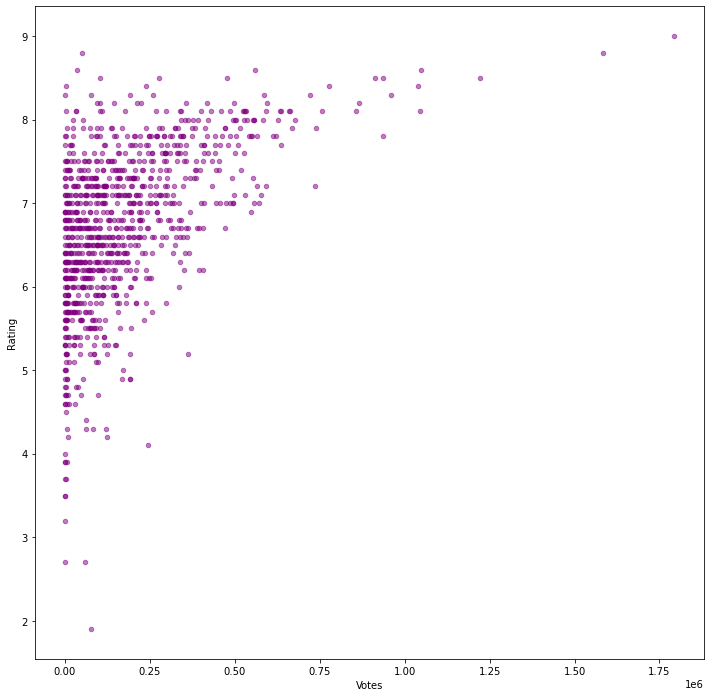

In [512]:
#  plot scatter between voting and rating 
movie.plot(kind='scatter', x='Votes', y='Rating',alpha=0.5, color='purple', figsize=(12,12))
plt.show()

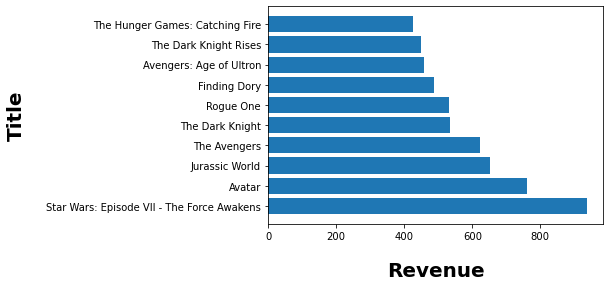

In [540]:
# print top 10 movies which has higher revenue
rate=movie.sort_values(('Revenue_Millions'),ascending=False)
rate.head(10)
print("\n")

# plot horizontal barchart of upper output
plt.barh(rate['Title'].head(10),rate['Revenue_Millions'].head(10))
plt.xlabel("Revenue",labelpad=20, weight='bold', size=20)
plt.ylabel("Title",labelpad=20, weight='bold', size=20)
plt.show()

     Rank                  Title                    Genre  \
54     55        The Dark Knight       Action,Crime,Drama   
80     81              Inception  Action,Adventure,Sci-Fi   
124   125  The Dark Knight Rises          Action,Thriller   
36     37           Interstellar   Adventure,Drama,Sci-Fi   
76     77           The Avengers            Action,Sci-Fi   
144   145       Django Unchained            Drama,Western   

                                           Description           Director  \
54   When the menace known as the Joker wreaks havo...  Christopher Nolan   
80   A thief, who steals corporate secrets through ...  Christopher Nolan   
124  Eight years after the Joker's reign of anarchy...  Christopher Nolan   
36   A team of explorers travel through a wormhole ...  Christopher Nolan   
76   Earth's mightiest heroes must come together an...        Joss Whedon   
144  With the help of a German bounty hunter , a fr...  Quentin Tarantino   

                                

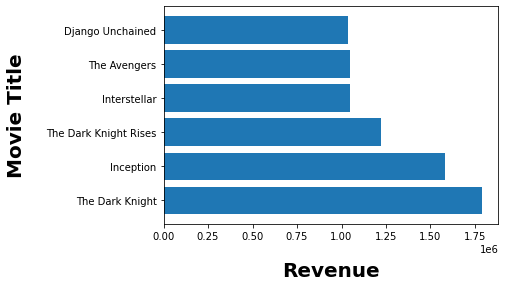

In [541]:
# top 10 movies which has highest number of voting greater than 1000000
votes= movie.sort_values(["Votes"], ascending=False)
votes=votes[votes["Votes"]>1000000]
print(votes.head(10))

# plot horizontal barchart of upper output 
plt.barh(votes["Title"].head(10),votes["Votes"].head(10))
plt.xlabel("Revenue",labelpad=20, weight='bold', size=20)
plt.ylabel("Movie Title",labelpad=20, weight='bold', size=20)
plt.show()

1232.4060000000002




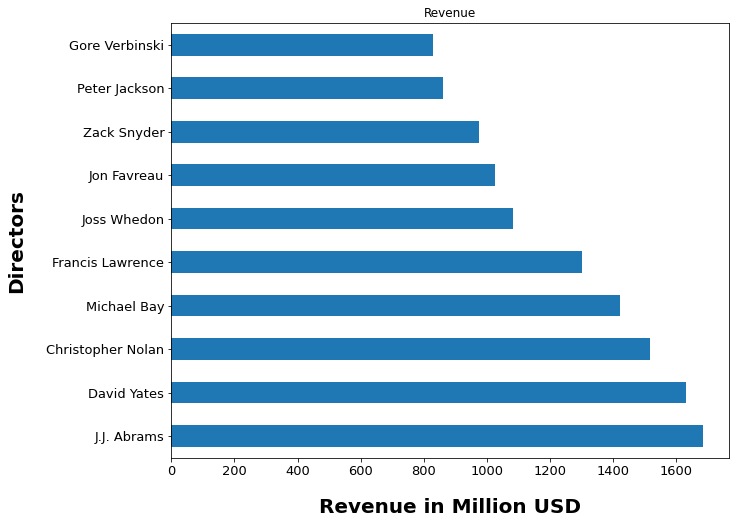

In [545]:
# print top 10 directors, which has generated highest "average ravenue".
average_ravenue=(movie.groupby(['Director'])['Revenue_Millions'].sum().sort_values(ascending=False)[:10]).mean()
print(average_ravenue)
print("\n")

# plot horizontal bar chart of revenue w.r.t director
movie.groupby(['Director'])['Revenue_Millions'].sum().sort_values(ascending=False)[:10].plot(kind='barh', figsize=(10,8), fontsize=13)
plt.ylabel('Directors',labelpad=20, weight='bold', size=20)
plt.xlabel('Revenue in Million USD',labelpad=20, weight='bold', size=20)
plt.title("Revenue")

plt.show()

In [550]:
# calculate total and average revenue of each gerne 
g1=movie.groupby('Genre')['Revenue_Millions']
g2=movie.groupby('Genre').agg({'Revenue_Millions':'mean'})


# prin hitogram of upper output, like showing below

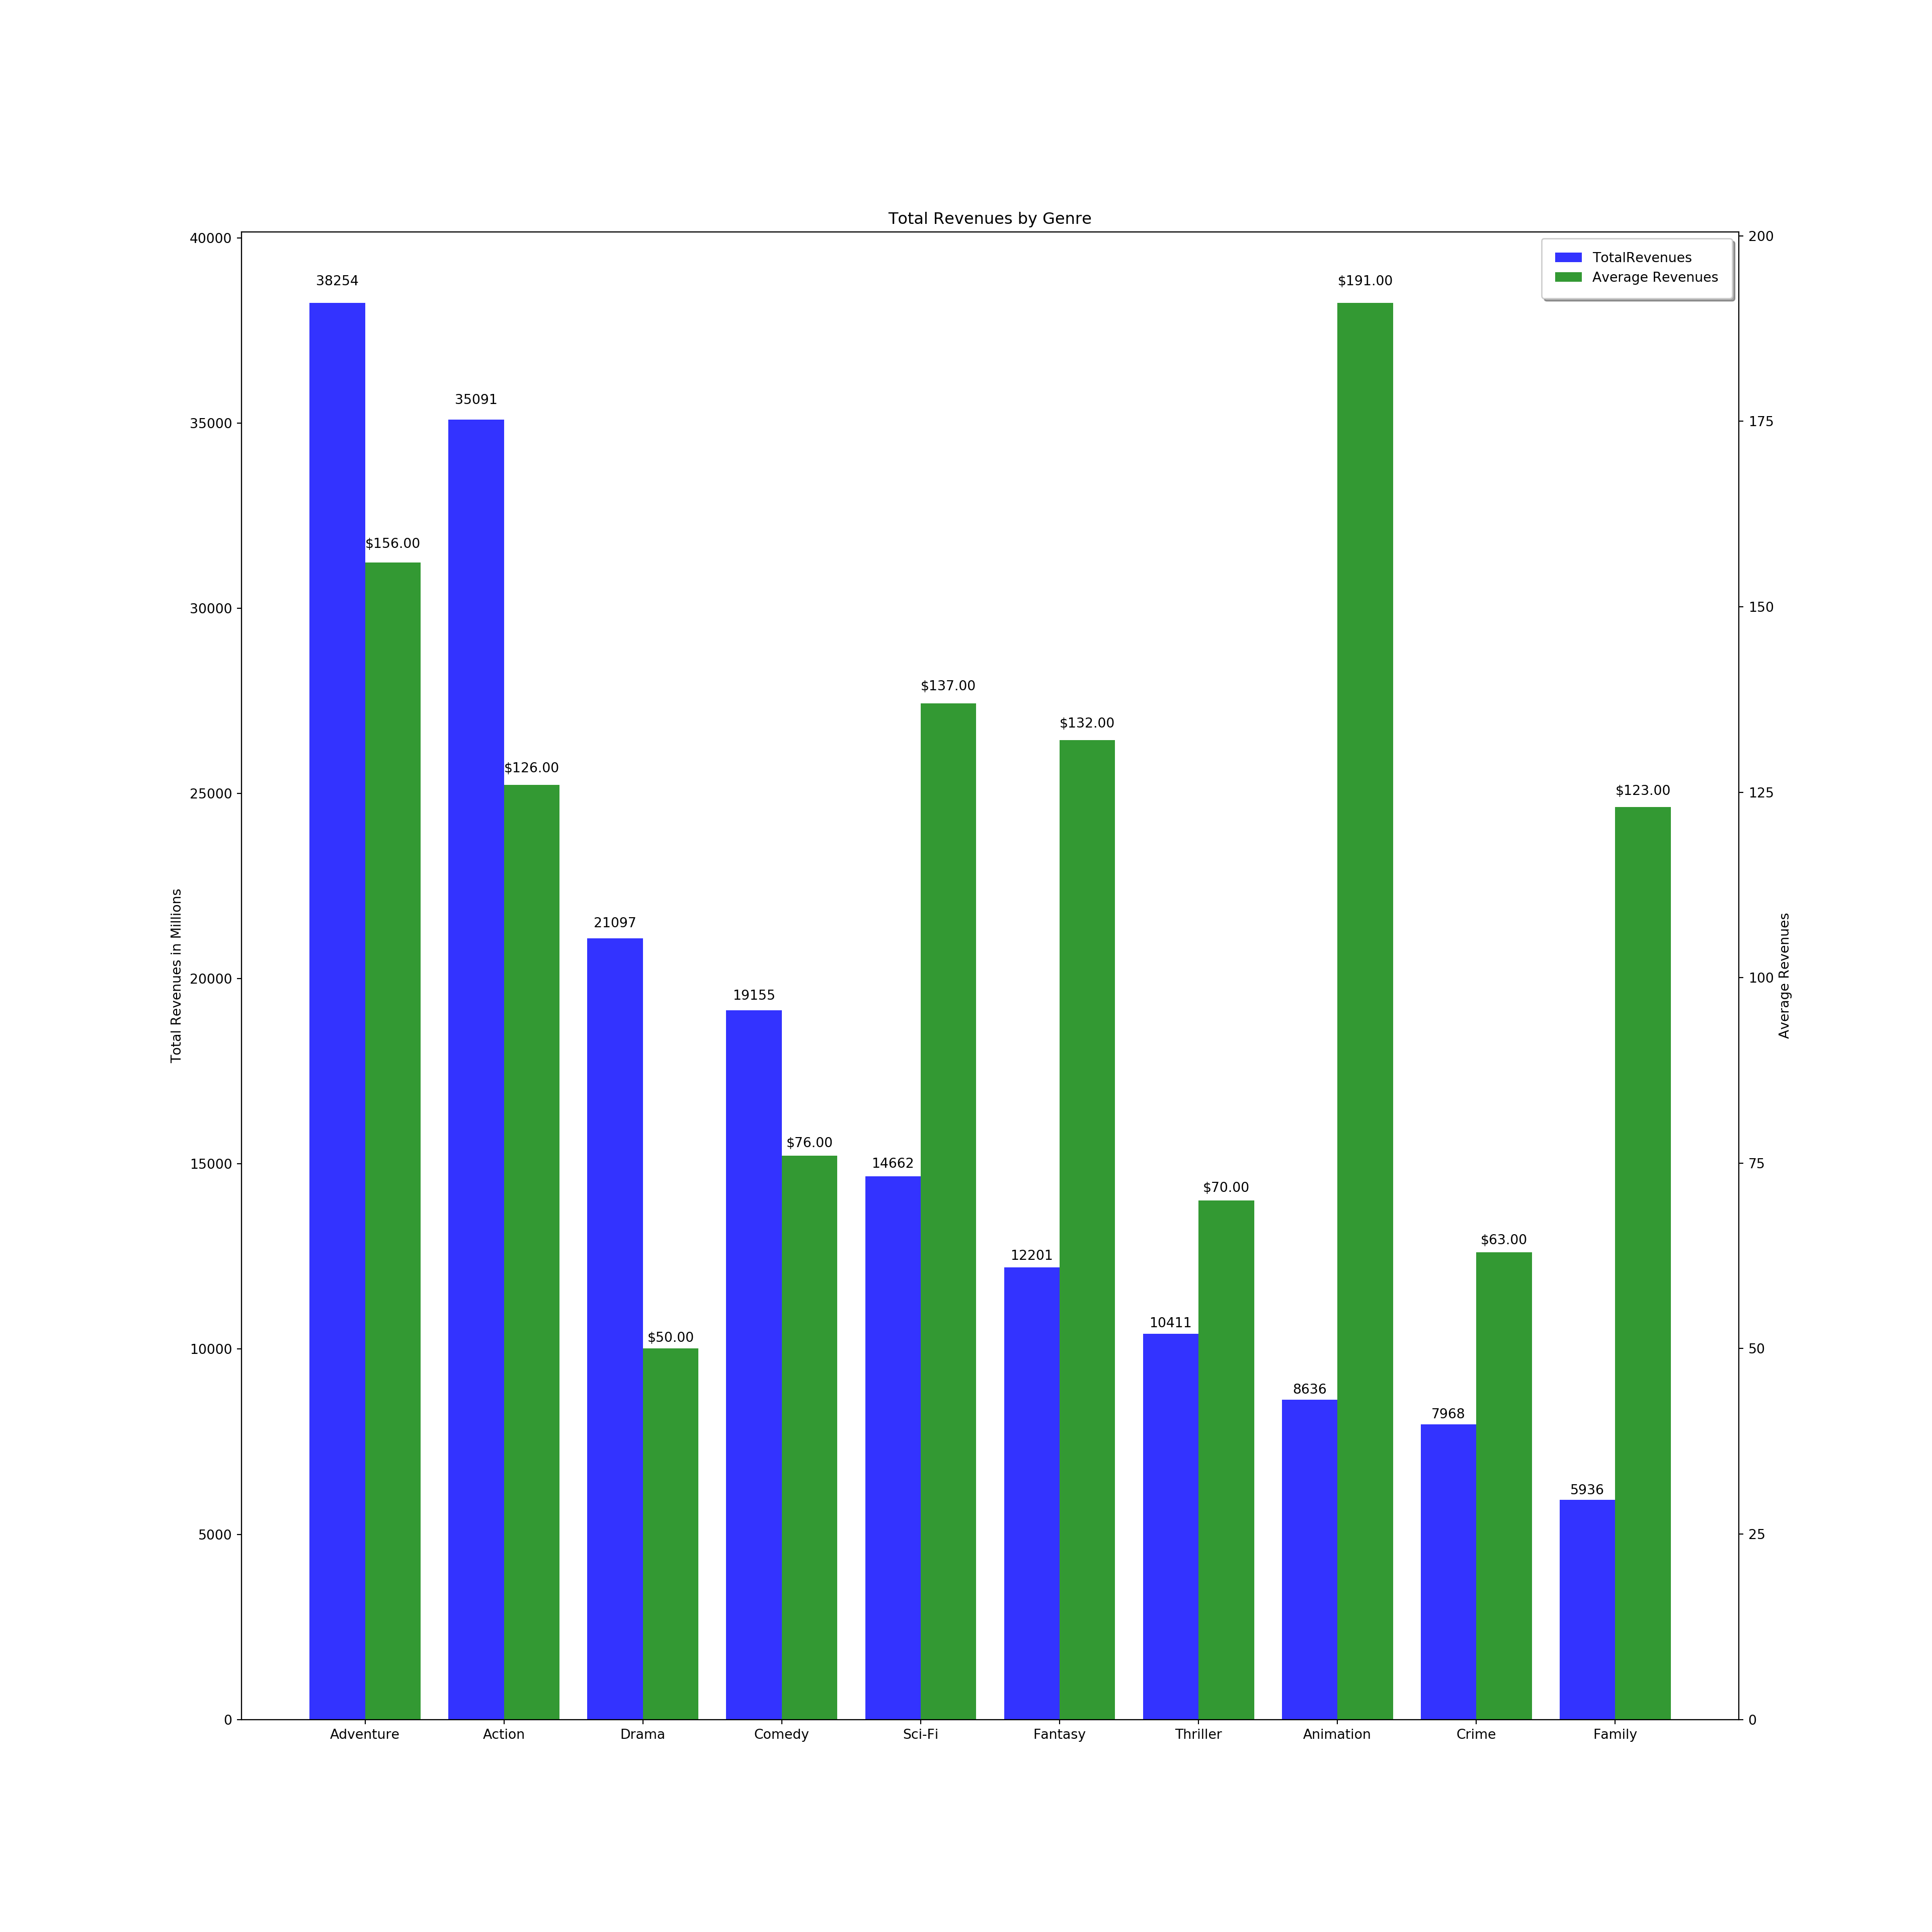

                                 Revenue_Millions    Rating
Genre                      Year                            
Action                     2016            131.56  6.150000
Action,Adventure           2007            336.53  6.200000
                           2012            262.03  7.000000
                           2014             72.66  6.000000
Action,Adventure,Biography 2015             24.99  6.900000
...                                           ...       ...
Sci-Fi,Thriller            2008             64.51  5.000000
Thriller                   2007               NaN  7.100000
                           2014              0.32  6.700000
                           2016               NaN  5.685714
Thriller,War               2016               NaN  6.000000

[583 rows x 2 columns]


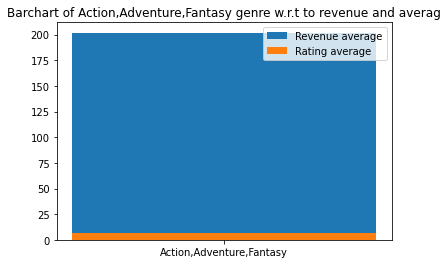

In [555]:
# Exploratory yearly analysis with dimensions on genres, revenue, rating
# like in 2010, each gerne movie generated average revenue and got this average rating
g1=movie.groupby(['Genre','Year']).agg({'Revenue_Millions':'mean','Rating':'mean'})
print(g1)

# plot barchart of gerne w.r.t to revenue and average
plt.bar('Action,Adventure,Fantasy',[movie[movie['Genre']=='Action,Adventure,Fantasy'].Revenue_Millions.mean(),],label="Revenue average")
plt.bar('Action,Adventure,Fantasy',movie[movie['Genre']=='Action,Adventure,Fantasy'].Rating.mean(),label="Rating average")
plt.legend()
plt.title("Barchart of Action,Adventure,Fantasy genre w.r.t to revenue and averag")
plt.show()